In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X,y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)

In [5]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [6]:
y_pred = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
y_pred

array([4, 1, 3, 4, 0, 0, 2, 3, 3, 1], dtype=int32)

In [8]:
y_pred is kmeans.labels_

True

In [10]:
v = kmeans.cluster_centers_
v

array([[ 0.0401914 ,  1.81961691],
       [ 1.83183315,  4.28894623],
       [-4.07989383,  3.57150086],
       [ 2.80560419,  0.65580377],
       [ 0.99668244,  5.23622333]])

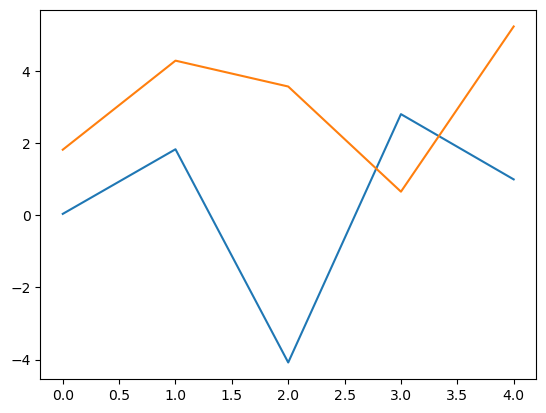

In [13]:
plt.plot(v)

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
kmeans.predict(X_new)

array([0, 3, 2, 2], dtype=int32)

In [16]:
X_newest = kmeans.transform(X_new).round(2)
X_newest

array([[0.18, 2.93, 4.37, 3.11, 3.39],
       [2.97, 2.57, 7.25, 1.36, 3.81],
       [3.26, 5.  , 1.22, 6.26, 4.58],
       [3.12, 5.15, 1.52, 6.09, 4.84]])

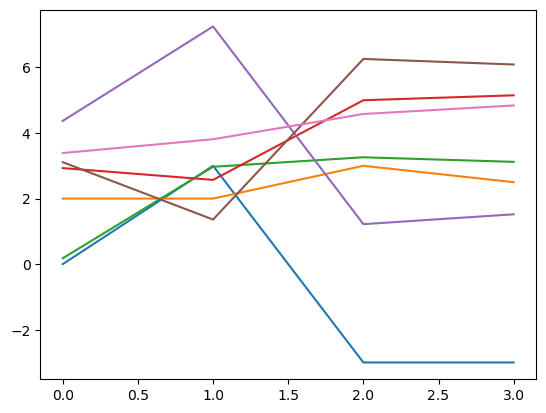

In [17]:
plt.plot(X_new)
plt.plot(X_newest)

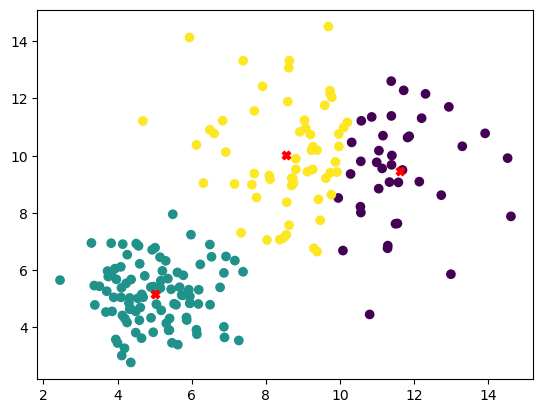

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

# K-means clustering preparation
k = 3
np.random.seed(42)
centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]

def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = []
        for j in centroids:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# K-means clustering function
def kmeans_clustering(x, k):
    centroids = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]
    
    for i in range(10):
        get_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(get_centroids, x)

    return centroids, get_centroids

# Applying K-means clustering
centroids, get_centroids = kmeans_clustering(x, k)

# Visualization of the final clustering
plt.scatter(x[:,0], x[:,1], c=get_centroids)
plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], c='red', marker='X')
plt.show()

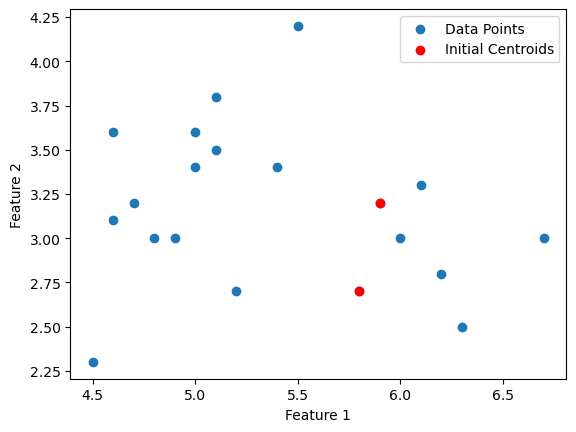

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids
def initialize_centroids(points, k):
  """
  This function shuffles the data points and selects 'k' centroids randomly.

  Args:
      points: A numpy array of shape (n_samples, n_features) containing the data points.
      k: The number of clusters (centroids) to initialize.

  Returns:
      A numpy array of shape (k, n_features) containing the initial centroids.
  """
  # Shuffle the data points
  np.random.shuffle(points)

  # Select the first 'k' points as initial centroids
  centroids = points[:k]
  return centroids

# Create a larger toy dataset
data = np.array([[5.1, 3.5], [4.5, 2.3], [6.2, 2.8], [5.8, 2.7],
                 [4.9, 3.0], [5.1, 3.8], [6.0, 3.0], [5.4, 3.4],
                 [4.7, 3.2], [4.6, 3.6], [5.2, 2.7], [5.5, 4.2],
                 [4.6, 3.1], [5.0, 3.4], [5.9, 3.2], [6.1, 3.3],
                 [5.0, 3.6], [4.8, 3.0], [6.7, 3.0], [6.3, 2.5]])

# Initialize centroids for 2 clusters
k = 2
centroids = initialize_centroids(data.copy(), k)  # Copy data to avoid modifying original

# Visualize the data points and initial centroids
plt.scatter(data[:, 0], data[:, 1], label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
